# Claudia Pinzón

# Facebook

In [6]:
import pandas as pd
import numpy as np

import re

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
import unicodedata
from unicodedata import normalize
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

from facebook_scraper import get_posts

In [2]:
# Información de las publicaciones

Grupo1 = []
for post in get_posts('462421900608216', pages=50):
    Grupo1.append(post)

Grupo2 = []
for post in get_posts('462421900608216', pages=50):
    Grupo2.append(post)
    
Grupo3 = []
for post in get_posts('823460854474994', pages=50):
    Grupo3.append(post)

Grupo4 = []
for post in get_posts('1101337576603230', pages=50):
    Grupo4.append(post)
    
Grupo5 = []
for post in get_posts('1473423622978700', pages=50):
    Grupo5.append(post)
    
Pag1=[]
for post in get_posts('ColombianosAfta', pages=50):
    Pag1.append(post)

Pag2=[]
for post in get_posts('Berracoschile', pages=50):
    Pag2.append(post)  
    
Grupo1 = pd.DataFrame(Grupo1)
Grupo2 = pd.DataFrame(Grupo2)
Grupo3 = pd.DataFrame(Grupo3)
Grupo4 = pd.DataFrame(Grupo4)
Grupo5 = pd.DataFrame(Grupo5)
Pag1 = pd.DataFrame(Pag1)
Pag2 = pd.DataFrame(Pag2)

post=pd.concat([Grupo1, Grupo2, Grupo3, Grupo4, Grupo5, Pag1, Pag2], axis=0)
post.head()

C:\Users\eliza\anaconda3\lib\site-packages\facebook_scraper\facebook_scraper.py:186: UserWarning: Locale detected as es_LA - for best results, set to en_US
  warnings.warn(f"Locale detected as {locale} - for best results, set to en_US")


,post_id,text,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,...,factcheck,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,available,comments_full,reactors,w3_fb_url
0,1697970353720025,Gumercindo Sacanambuy\n19 h ·\n\nMañana no al ...,,Gumercindo Sacanambuy\n19 h ·\n\nMañana no al ...,2021-06-03 18:47:14,None,None,[],[],[],...,None,2093429704132926,2021-06-03 00:15:53.429489,100003977502222,Gumercindo Sacanambuy,https://facebook.com/story.php?story_fbid=2093...,True,None,None,None
1,1697969680386759,Delicias De Bart\n30 min ·\n\nFeliz y bendecid...,,Delicias De Bart\n30 min ·\n\nFeliz y bendecid...,2021-06-03 18:46:32,None,https://scontent.fbog2-4.fna.fbcdn.net/v/t1.64...,None,None,[https://scontent.fbog2-4.fna.fbcdn.net/v/t1.6...,...,None,281116153755321,2021-06-03 18:45:54.385769,100055708157482,Delicias De Bart,https://facebook.com/story.php?story_fbid=2811...,True,None,None,None
2,1697955400388187,Perro Burger\n24 de mayo a las 22:15 ·\n\n𝐄𝐱𝐪𝐮...,,Perro Burger\n24 de mayo a las 22:15 ·\n\n𝐄𝐱𝐪𝐮...,2021-06-03 18:08:08,None,https://scontent.fbog2-5.fna.fbcdn.net/v/t1.64...,"[None, None, None]",[Puede ser una imagen de comida y texto que di...,[https://scontent.fbog2-5.fna.fbcdn.net/v/t1.6...,...,None,842903433098950,2021-05-24 22:15:00.000000,161593077896659,Perro Burger,https://facebook.com/story.php?story_fbid=8429...,True,None,None,None
3,1697929003724160,Los Bochincheros\n20 h ·\n\nIdeas Geniales ó M...,,Los Bochincheros\n20 h ·\n\nIdeas Geniales ó M...,2021-06-03 17:06:18,None,None,[],[],[],...,None,215552567053198,2021-06-02 23:15:56.713031,100737965201326,Los Bochincheros,https://facebook.com/story.php?story_fbid=2155...,True,None,None,None
4,1697257550457972,Yuber Fabian Cordoba Calvache\n1 de junio a la...,,Yuber Fabian Cordoba Calvache\n1 de junio a la...,2021-06-02 17:52:26,None,None,[],[],[],...,None,10215857150861335,2021-06-01 12:15:00.000000,1822459502,Yuber Fabian Cordoba Calvache,https://facebook.com/story.php?story_fbid=1021...,True,None,None,None


In [8]:
post.text
palabra = post.text.str.cat(sep=" ")
stopwords.extend(["Colectividad", "Colombianos", "Residentes", "Antofagasta", "Colombia" , "Chile", "colombianos", "colombia" , "chile", 
                  "https", "cl", "co", "gov", "com", ".", "am", "pm", "at", "www", "hrs", "hoy", "día", "año",
                  "hora", "horas", "migrante", "facebook", "post_id", "image", "images", "user_url", "post_id", "shared", "link"])

In [9]:
#Pre-procesamiento
def pre_procesado(texto):
    texto = texto.lower()                                                         #pasar a minúsculas
    texto = re.sub(r"[\W\d_´]+", " ", texto)                                      #eliminar caracteres
    texto = [palabra for palabra in texto.split() if palabra not in stopwords] #quitar palabras vacías
    texto = [texto.lower() for texto in texto if len(texto) > 3 and texto.isalpha()] #quitar palabras de menos de 2 caracteres
    texto = " ".join(texto)
    return (texto)

post['pp'] = post.text.apply(lambda texto: pre_procesado(texto))
post.head()

,post_id,text,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,...,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,available,comments_full,reactors,w3_fb_url,pp
0,1697970353720025,Gumercindo Sacanambuy\n19 h ·\n\nMañana no al ...,,Gumercindo Sacanambuy\n19 h ·\n\nMañana no al ...,2021-06-03 18:47:14,None,None,[],[],[],...,2093429704132926,2021-06-03 00:15:53.429489,100003977502222,Gumercindo Sacanambuy,https://facebook.com/story.php?story_fbid=2093...,True,None,None,None,gumercindo sacanambuy mañana partido fútbol me...
1,1697969680386759,Delicias De Bart\n30 min ·\n\nFeliz y bendecid...,,Delicias De Bart\n30 min ·\n\nFeliz y bendecid...,2021-06-03 18:46:32,None,https://scontent.fbog2-4.fna.fbcdn.net/v/t1.64...,None,None,[https://scontent.fbog2-4.fna.fbcdn.net/v/t1.6...,...,281116153755321,2021-06-03 18:45:54.385769,100055708157482,Delicias De Bart,https://facebook.com/story.php?story_fbid=2811...,True,None,None,None,delicias bart feliz bendecido jueves activos a...
2,1697955400388187,Perro Burger\n24 de mayo a las 22:15 ·\n\n𝐄𝐱𝐪𝐮...,,Perro Burger\n24 de mayo a las 22:15 ·\n\n𝐄𝐱𝐪𝐮...,2021-06-03 18:08:08,None,https://scontent.fbog2-5.fna.fbcdn.net/v/t1.64...,"[None, None, None]",[Puede ser una imagen de comida y texto que di...,[https://scontent.fbog2-5.fna.fbcdn.net/v/t1.6...,...,842903433098950,2021-05-24 22:15:00.000000,161593077896659,Perro Burger,https://facebook.com/story.php?story_fbid=8429...,True,None,None,None,perro burger mayo 𝐄𝐱𝐪𝐮𝐢𝐬𝐢𝐭𝐚 𝐜𝐨𝐦𝐢𝐝𝐚 𝐫𝐚𝐩𝐢𝐝𝐚 𝐂𝐨𝐥𝐨...
3,1697929003724160,Los Bochincheros\n20 h ·\n\nIdeas Geniales ó M...,,Los Bochincheros\n20 h ·\n\nIdeas Geniales ó M...,2021-06-03 17:06:18,None,None,[],[],[],...,215552567053198,2021-06-02 23:15:56.713031,100737965201326,Los Bochincheros,https://facebook.com/story.php?story_fbid=2155...,True,None,None,None,bochincheros ideas geniales estu ideas bochinc...
4,1697257550457972,Yuber Fabian Cordoba Calvache\n1 de junio a la...,,Yuber Fabian Cordoba Calvache\n1 de junio a la...,2021-06-02 17:52:26,None,None,[],[],[],...,10215857150861335,2021-06-01 12:15:00.000000,1822459502,Yuber Fabian Cordoba Calvache,https://facebook.com/story.php?story_fbid=1021...,True,None,None,None,yuber fabian cordoba calvache junio pregunta a...


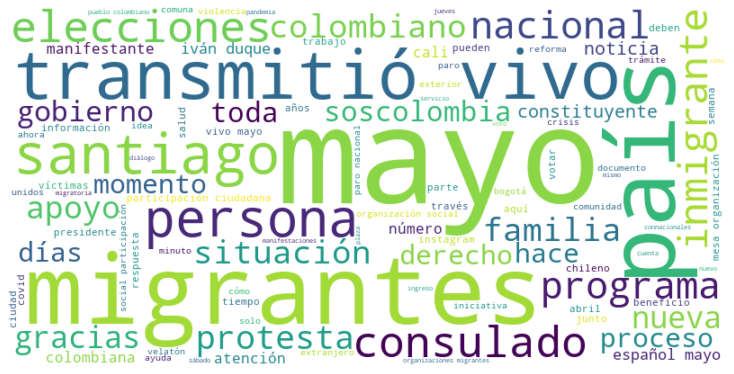

In [10]:
palabras = post.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="viridis",
                      stopwords=stopwords).generate(palabras)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [11]:
#Quitar emojis
import regex
import emoji
def get_emojis(text):
    emoji_list = []
    datos = regex.findall(r'\X', text)
    for word in datos:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list
post['emojis'] = post['text'].apply(lambda text: get_emojis(text))
post.head()

,post_id,text,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,...,shared_time,shared_user_id,shared_username,shared_post_url,available,comments_full,reactors,w3_fb_url,pp,emojis
0,1697970353720025,Gumercindo Sacanambuy\n19 h ·\n\nMañana no al ...,,Gumercindo Sacanambuy\n19 h ·\n\nMañana no al ...,2021-06-03 18:47:14,None,None,[],[],[],...,2021-06-03 00:15:53.429489,100003977502222,Gumercindo Sacanambuy,https://facebook.com/story.php?story_fbid=2093...,True,None,None,None,gumercindo sacanambuy mañana partido fútbol me...,[]
1,1697969680386759,Delicias De Bart\n30 min ·\n\nFeliz y bendecid...,,Delicias De Bart\n30 min ·\n\nFeliz y bendecid...,2021-06-03 18:46:32,None,https://scontent.fbog2-4.fna.fbcdn.net/v/t1.64...,None,None,[https://scontent.fbog2-4.fna.fbcdn.net/v/t1.6...,...,2021-06-03 18:45:54.385769,100055708157482,Delicias De Bart,https://facebook.com/story.php?story_fbid=2811...,True,None,None,None,delicias bart feliz bendecido jueves activos a...,"[🙏🏽, 🙏🏽, 😎, 🍟, 🥓, 🍔, 🍲, 📍, 📲, ☎️]"
2,1697955400388187,Perro Burger\n24 de mayo a las 22:15 ·\n\n𝐄𝐱𝐪𝐮...,,Perro Burger\n24 de mayo a las 22:15 ·\n\n𝐄𝐱𝐪𝐮...,2021-06-03 18:08:08,None,https://scontent.fbog2-5.fna.fbcdn.net/v/t1.64...,"[None, None, None]",[Puede ser una imagen de comida y texto que di...,[https://scontent.fbog2-5.fna.fbcdn.net/v/t1.6...,...,2021-05-24 22:15:00.000000,161593077896659,Perro Burger,https://facebook.com/story.php?story_fbid=8429...,True,None,None,None,perro burger mayo 𝐄𝐱𝐪𝐮𝐢𝐬𝐢𝐭𝐚 𝐜𝐨𝐦𝐢𝐝𝐚 𝐫𝐚𝐩𝐢𝐝𝐚 𝐂𝐨𝐥𝐨...,"[🟡, 🔵, 🔴, 🏠, 🙏, 😷, 👌, 🤤, 📍, 📲, ☎️, 📍, 📲, ☎️, ⏰..."
3,1697929003724160,Los Bochincheros\n20 h ·\n\nIdeas Geniales ó M...,,Los Bochincheros\n20 h ·\n\nIdeas Geniales ó M...,2021-06-03 17:06:18,None,None,[],[],[],...,2021-06-02 23:15:56.713031,100737965201326,Los Bochincheros,https://facebook.com/story.php?story_fbid=2155...,True,None,None,None,bochincheros ideas geniales estu ideas bochinc...,[]
4,1697257550457972,Yuber Fabian Cordoba Calvache\n1 de junio a la...,,Yuber Fabian Cordoba Calvache\n1 de junio a la...,2021-06-02 17:52:26,None,None,[],[],[],...,2021-06-01 12:15:00.000000,1822459502,Yuber Fabian Cordoba Calvache,https://facebook.com/story.php?story_fbid=1021...,True,None,None,None,yuber fabian cordoba calvache junio pregunta a...,[]


In [ ]:
#Método del codo para determinar  𝐾 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(post.pp.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

In [13]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [14]:
ks = []
k_inertias = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)
    
list(zip(ks,k_inertias))

[(1, 441.7744965556786),
 (2, 437.3954740542728),
 (3, 433.3263843659947),
 (4, 431.95188489647745),
 (5, 430.3339194843415),
 (6, 427.83990759639306),
 (7, 424.6343108098787),
 (8, 423.04308113242905),
 (9, 421.46631606986097)]

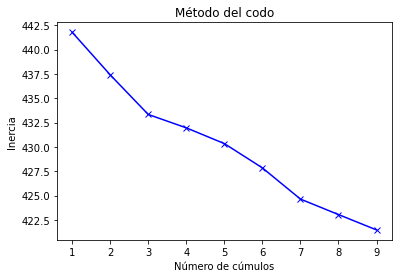

In [15]:
# Método del codo
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'bx-')

In [37]:
#Entrenamiento del modelo
k = 6
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=6)

In [38]:
post['cluster'] = model.labels_

In [39]:
#los vecinos más cercanas al centroide
#entrenamiento con matriz tfif
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

#porcentaje de los datos de cada clase
clust_cnt = post['cluster'].value_counts()
clust_cnt_pct = post['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"CLUSTER #{i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    
    print("Palabras más importantes: ")
    for ind in order_centroids[i][:10]:
        print(terms[ind], end=" ")
    print()
    
    print(f"Comentarios más Representativos: ")
    for vecino in post.iloc[nbrs.kneighbors([centroids[i]])[1][0]].text.values:
        print(f" *{vecino}")
        
    print("********************************************")
    print()

CLUSTER #0
Tiene 37 registros (8.11% de los datos)
Palabras más importantes: 
vivo transmitió mayo cali paro nacional conversación jaider zambrano noticias 
Comentarios más Representativos: 
 *
 *
 *
********************************************

CLUSTER #1
Tiene 160 registros (35.09% de los datos)
Palabras más importantes: 
gracias migración información eltiempo nueva hola colombiano clase bono alguien 
Comentarios más Representativos: 
 *
 *
 *
********************************************

CLUSTER #2
Tiene 44 registros (9.65% de los datos)
Palabras más importantes: 
antofagasta colectividad residentes video pandemia consulado programa través lipigas junto 
Comentarios más Representativos: 
 *
 *
 *
********************************************

CLUSTER #3
Tiene 37 registros (8.11% de los datos)
Palabras más importantes: 
migrantes esperando irregulares niñas niños salud cantidad organizaciones votar regionalista 
Comentarios más Representativos: 
 *
 *
 *
******************************

In [34]:
#Poner etiquetas o nombres a los clústers
clusters = {0: 'Política colombiana',
            1: 'Constituyente Chile',
            2: 'Fiestas y celebraciones',
            3: 'Ayudas económicas',
            4: 'Redes sociales',
           }

post['nombres_clusters'] = post['cluster'].apply(lambda val: clusters[val])
post.sample(5)

,post_id,text,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,...,shared_username,shared_post_url,available,comments_full,reactors,w3_fb_url,pp,emojis,cluster,nombres_clusters
8,1697909887059405,,,,2021-06-03 16:25:11,None,https://scontent.fbog2-4.fna.fbcdn.net/v/t1.64...,"[None, None, None, None, None]",[Puede ser una imagen de reloj de pulsera y te...,[https://scontent.fbog2-4.fna.fbcdn.net/v/t1.6...,...,None,None,True,None,None,None,,[],0,Política colombiana
116,2915996325337672,18 años como inmigrante colombiana en Chile 🇨🇴...,18 años como inmigrante colombiana en Chile 🇨🇴...,24horas.cl\n15 de mayo a las 21:55 ·\n\nMujer ...,2021-05-15 18:04:26,None,None,[],[],[],...,24horas.cl,https://facebook.com/story.php?story_fbid=1015...,True,None,None,None,años inmigrante colombiana elecciones mayo muj...,[],1,Constituyente Chile
68,1757036511135383,CNNCHILE.COM\nExperto por ley de migración: “P...,,CNNCHILE.COM\nExperto por ley de migración: “P...,2021-04-15 10:11:09,None,https://external.fbog2-5.fna.fbcdn.net/safe_im...,[],[],[https://external.fbog2-5.fna.fbcdn.net/safe_i...,...,None,None,True,None,None,None,cnnchile experto migración prioriza restriccio...,[],0,Política colombiana
76,1750132921825742,CNNCHILE.COM\nBono Clase Media 2021: Cuáles so...,,CNNCHILE.COM\nBono Clase Media 2021: Cuáles so...,2021-04-05 21:38:26,None,https://external.fbog2-5.fna.fbcdn.net/safe_im...,[],[],[https://external.fbog2-5.fna.fbcdn.net/safe_i...,...,None,None,True,None,None,None,cnnchile bono clase media cuáles requisitos po...,[],0,Política colombiana
14,1988154944672240,Una pregunta alguien a viajado desde colombia ...,Una pregunta alguien a viajado desde colombia ...,,2021-06-02 11:44:11,None,None,[],[],[],...,None,None,True,None,None,None,pregunta alguien viajado últimos días alguna f...,[],0,Política colombiana
